<a href="https://colab.research.google.com/github/sofiaIman/Machine-learning-Group4-Tasks/blob/main/Group4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST-CNN digits classification

A Convolutional Neural Networks (CNN) model that classifies handwritten digits as numbers 0 - 9

MNIST dataset is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

In [ ]:
#import the libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Get the MNIST dataset from keras website

In [ ]:
from keras.datasets import mnist

Load and split the data into train set and test sets

In [ ]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

We now have train and test datasets

Get the shape of the data

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The X_train contains 60,000 28x28 pixel images while the X_test contains 10,000 28x28 pixel images

Taking a look at the last item of the training data

In [ ]:
X_train[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Print the image label of the last item in the train dataset

In [ ]:
y_train[59999]

8

Show the image of the last item of the train dataset

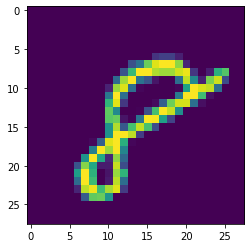

In [ ]:
plt.imshow(X_train[59999])

Reshape the data to fit the model

In [ ]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

One-Hot Encode Y datasets to input into the neural network

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Print the new label

In [ ]:
print(y_train_one_hot[59999])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


we see a label 1 at index=8 therefore the data in encoded

Building the Convoluted Neural Network

In [ ]:
model = Sequential()

Adding layers to the model

In [ ]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))#the layer extracts features from the input image, and create 64 channels of ReLu 3x3 convolved features
model.add(Conv2D(32, kernel_size=3, activation='relu'))#the layer extracts features from the input image, and create 32 channels of ReLu 3x3 convolved features
model.add(Flatten())#Flattens the image into a 1D Array to feed into and connect with the neural network
model.add(Dense(10, activation='softmax'))# The last layer has 10 neurons because we have 10 labels

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

we use categorical_cross entropy because classes are more that 2

#Training the model

training the model using encoded data

In [ ]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2106 - accuracy: 0.9500 - val_loss: 0.0956 - val_accuracy: 0.9723
Epoch 2/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0683 - accuracy: 0.9794 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 3/3
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.1197 - val_accuracy: 0.9692


Show predictions as probabilites for a random range of images in the test set

In [ ]:
predictions = model.predict(X_test[9945:9949])
predictions

array([[1.1602601e-09, 3.2361963e-06, 1.8892485e-10, 8.5016081e-06,
        8.3789334e-02, 1.3663000e-06, 2.9566108e-10, 1.4770543e-03,
        1.7296055e-05, 9.1470313e-01],
       [1.5029383e-09, 9.9993694e-01, 2.3922346e-05, 3.6893402e-09,
        9.9867214e-07, 9.1245198e-09, 4.1901114e-12, 5.2495470e-06,
        1.2145497e-05, 2.0762916e-05],
       [6.6296241e-05, 1.7790386e-08, 1.3990754e-05, 2.7584865e-10,
        9.9990904e-01, 6.5109346e-10, 7.1316060e-09, 1.1752662e-06,
        8.6018536e-12, 9.4783254e-06],
       [9.9999917e-01, 1.3534467e-13, 3.7709867e-07, 2.3679939e-10,
        4.6467197e-13, 6.7096977e-08, 2.9404021e-10, 3.3051139e-13,
        3.7921959e-07, 3.8995016e-11]], dtype=float32)

Printing the predicitons as number labels

In [ ]:
print("Predicted labels")
print(np.argmax(predictions, axis=1))

Predicted labels
[9 1 4 0]


Printing the actual labels

In [ ]:
print("Actual labels")
print(y_test[9945:9949])

Actual labels
[9 1 4 0]


We see here that the actual labels match the labels predicted by the model